# Classifying moview review: a binary classification example


Two-class classification, or binary classification. In this example, we learn to classify movie reviews as positive or negative based on the text content of the reviews.



In [ ]:
#Required Libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os # library for file and folder traversal
from keras.datasets import imdb # keras.datasets library has a list of popular data
from keras import models # this library calls model
from keras import layers # required for building dense layers
from keras import optimizers # define Dense layer optimizers
import matplotlib.pyplot as plt # required for ploting loss vs epochs

from keras.utils import to_categorical # library to encode labels

In [ ]:
print(os.listdir("../input/imdb-data/"))

In [ ]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

Argument __num_words__ = 10000, allows us to keep first 10k most common words.

Ouput of train_data, and test_data are lists of reviews from user. Additionally, the list of output from train_labels and test_labels are list of 0s and 1s, where 0 stands for negative and 1 stands for positive feeback/review.

In [ ]:
#train_data
#test_data
#train_labels
test_labels

## Decode reviews
Decoding some of the reviews from numeric to text.

In [ ]:
word_index = imdb.get_word_index() # word_index is a dictionary mapping words to an integer index
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()]) # reverse it, mapping integer indices to words
decoded_review = ' '.join([reverse_word_index.get(i -3, '?') for i in train_data[2]]) # decode the review, first 3 indices are not relevent

In [ ]:
decoded_review

## Data preparation

* Function _vectorize_sequences_ creates an all zero matrix of shape (len(data), num_of_columns).
* Later this function is called to vectorize training data, and test data.

In [ ]:
def vectorize_sequences(sequences, dimension = 10000): 
    # sequence arguement denotes number of review i.e. number of rows in dataset
    # dimension argument denotes number of columns
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results # Returns, a tensor of shape (len(sequence), dimension)

In [ ]:
x_train = vectorize_sequences(train_data) # 
x_test = vectorize_sequences(test_data)

In [ ]:
x_train

In [ ]:
x_test

Similarly, we should vectorize train_labels and test_labels.

In [ ]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [ ]:
y_train

In [ ]:
y_test

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

## Model

A three layer network
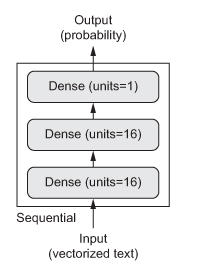

#### What are the activation functions, and why are they necessary?

Without an activation function like _relu_(also called a _non-linearity_), the _Dense layer_ would consist of two linear operations-a dot product and an addition:
``` output = dot(W, input) + b ```

SO the layer could only learn _linear transformations_(affine transformations) of the input data: the _hypothesis space_ of the layer would be the set of all possible linear transformations of the input data into a 16-dimensional space. Such a hypothesis space is too restricted and would not benefit from multiple layers of representations, because a deep stack of linear layers would still implement a linear operation: adding more layers would not extend the hypothesis space.

In order to get access to a much richer hypothesis space that would benefit from deep representations, you need a non-linearity, or activation function. _relu_ is the most popular activation function in deep learning, but there are many other candidates, which all come with similarly strange names e.g. _prelu, elu,_ and so on.

In [ ]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Finally, one needs to choose a _loss function_ and an _optimizer_. Because you are facing a binary classification problem and the output of you network is a probability ( you end your network with a single-unit layer with a sigmoid activation), it is best to use the ``` binary_crossentropy``` loss for binary classification problem. It is not the only viable choise that you could use, for instance, ```mean_squared_error```. But crossentropy is usually the best choice when you are dealing with models that output probabilities. _Crossentropy_ is quantity from the field of _Information Theory_ that measures the distance between probability distributions or, in this case, between the ground-truth distribution and your predictions.

Here is the step where you configure the model with the ```RMSprop``` _optimizer_ and the ```binary_crossentropy``` loss function. Note that you will also monitor accuracy during training. 

We can pass _optimizer, loss function, and metrics_ as strings in the ```model.compile()``` function because ```RMSprop, binary_crossentropy, and accuracy``` are packaged as part of _Keras_. 

**Notes:** _Sometimes one needs to configure the parameters of optimizer or pass a custom loss function or metric function. This can be done by passing function objects as the loss and/or metrics arguments._

In [ ]:
model.compile(optimizer= optimizers.RMSprop(lr=0.001),
             loss='binary_crossentropy',
             metrics=['accuracy'])

Note that the call to ```model.fit()``` returns a ```History``` object. This object has a member _history_, which is a dictionary containing data about everything that happened during training. 

In [ ]:
history = model.fit(x_train,
                   y_train,
                   epochs=4,
                   batch_size=512,
                   validation_data=(x_test, y_test))

In [ ]:
history_dict = history.history
history_dict.keys()

In [ ]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss') 
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
plt.clf()
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [ ]:
results = model.evaluate(x_test, y_test)

In [ ]:
results

This is fairly naive approach and achieves an accuraccy of 88%; with state-of-art approches, we should be able to get close to 95%.

## Experiment with architecture changes

Let us change the architecture choices:

* Experiment-1. Take 3 hidden layer and evaluate the results.
* Experiment-2. Increase hidden units in dense layer to 32 units,
* Experiment-3. Increase hidden units in dense layer to 64 units,
* Experiment-4. Use ```mas_loss``` instead of ```binary_crossentropy```,
* Experiment-5. Try ```tanh``` activation instead of ```relu```.

#### Experiment-1

Take 3 hidden layer and evaluate the results.

In [ ]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

In [ ]:
model.compile(optimizer= optimizers.RMSprop(lr=0.001),
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [ ]:
history = model.fit(x_train,
                   y_train,
                   epochs=4,
                   batch_size=512,
                   validation_data=(x_test, y_test))

In [ ]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss') 
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
plt.clf()
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [ ]:
results = model.evaluate(x_test, y_test)
results

**Conclusion** NN architecture with two layer gave accuracy of 88.48%, and architecture with three layer gave accuracy of 87.36%. Therefore, it can be concluded that for this classification problem, 2 layer of Dense layer architecture is better than 3 layer of neural networks.

#### Experiment-2

Increase hidden units in dense layer to 32 units, but keep only 2 layers of dense layer as it performed better than 3 layers of NN.


In [ ]:
model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

In [ ]:
model.compile(optimizer= optimizers.RMSprop(lr=0.001),
             loss='binary_crossentropy',
             metrics=['accuracy'])

history = model.fit(x_train,
                   y_train,
                   epochs=4,
                   batch_size=512,
                   validation_data=(x_test, y_test))

In [ ]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss') 
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
plt.clf()
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [ ]:
results = model.evaluate(x_test, y_test)
results

**Conclusion**: Results show the architecture with 32 nurons per layer degraded model's accuracy to 87.16%, which is not an improvement over the architecture with 16 neurons per layer. Therefore, keep 16 neurons in the model.

#### Experiment-3

Increase hidden units in dense layer to 64 units with 2 dense layers.

In [ ]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

In [ ]:
model.compile(optimizer= optimizers.RMSprop(lr=0.001),
             loss='binary_crossentropy',
             metrics=['accuracy'])

history = model.fit(x_train,
                   y_train,
                   epochs=4,
                   batch_size=512,
                   validation_data=(x_test, y_test))

In [ ]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss') 
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
plt.clf()
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [ ]:
results = model.evaluate(x_test, y_test)
results

**Conclusion**: Results show that 64 neuron architecture is better than 32 neurons but not better than 16 neurons. Architecture with 64 neurons gave accuracy of 87.30% which is lower than the architecture with 16 neurons. 

#### Experiment-4: 

Use ```mas_loss``` instead of ```binary_crossentropy```.

In [ ]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

In [ ]:
model.compile(optimizer= optimizers.RMSprop(lr=0.001),
             loss='MSE',
             metrics=['accuracy'])

history = model.fit(x_train,
                   y_train,
                   epochs=4,
                   batch_size=512,
                   validation_data=(x_test, y_test))

In [ ]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss') 
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
plt.clf()
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [ ]:
results = model.evaluate(x_test, y_test)
results

**Conclusion**: The architecture with loss=```MSE``` gave an accuracy of 87.36%, which is not an improvement. Therefore, discard MSE as loss function.

#### Experiment-5:

* Choose ```tanh``` as activation function over ```relu```.

In [ ]:
model = models.Sequential()
model.add(layers.Dense(16, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(16, activation='tanh'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

In [ ]:
model.compile(optimizer= optimizers.RMSprop(lr=0.001),
             loss='binary_crossentropy',
             metrics=['accuracy'])

history = model.fit(x_train,
                   y_train,
                   epochs=4,
                   batch_size=512,
                   validation_data=(x_test, y_test))

In [ ]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss') 
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
plt.clf()
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [ ]:
results = model.evaluate(x_test, y_test)
results

#### Experiment-6

* Use ```LeakyReLU``` instead of ```relu```.

In [ ]:
from keras.layers import LeakyReLU

In [ ]:
model = models.Sequential()
model.add(layers.Dense(16, input_shape=(10000,)))
model.add(LeakyReLU(alpha=0.05))
model.add(layers.Dense(16))
model.add(LeakyReLU(alpha=0.05))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

In [ ]:
model.compile(optimizer= optimizers.RMSprop(lr=0.001),
             loss='binary_crossentropy',
             metrics=['accuracy'])

history = model.fit(x_train,
                   y_train,
                   epochs=4,
                   batch_size=512,
                   validation_data=(x_test, y_test))

In [ ]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss') 
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
plt.clf()
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [ ]:
results = model.evaluate(x_test, y_test)
results

#### Discussion

Take aways:
* One needs to do a bit of pre-processing on raw data to feed it as tensors into a neural network. Sequences of words can be encoded as binary vectors, but there are other encoding options too.
* Stacks of _Dense layers_ with _relu_ activations can solve a wide range of problems, and it is most frequently used activation function.
* In a binary classification problem (two output classes), the network should end with a _Dense_ layer with one unit and a _sigmoid_ activation i.e. the output of the network should be scalar between 0 and 1, after encoding a probability.
* With a scalar sigmoid output on a binary classification problem, the loss function you should use is ```binary_crossentropy```.
* The _rmsprop_ optimizer is generally a good enough choice, whatever your problem. That is one less thing for you to worry about. That is one less thing for you to worry about.
* As they get better their training data, neural networks eventually start overfitting and end up obtaining increasingly worse results on data they have never seen before. Be sure to always monitor performance on data that is outside of the training set.

# Multi-class classification

In the previous problem, we saw how to classify vector inputs into two mutually exclusive classes using a densely connected neural network. But what happens when you have more than two classes?

Here, we will build a neural network to classify _Reuter Newswires_ into 46 mutually exclusive topics. Becasue we have many classes, this problem is an instance of _mutliclass classification;_ and because each data point should be classified into only one category, the problem is more specifically an instance of _single-lable, multiclass classification._ If each data point could belong to multiple categories, you would be facing a _multilabel, multiclass classification_ problem.

### Reuters Dataset

We will work with _Reuters_ dataset in this section, a set of short newswires and their topics, published by Reuters in 1986. There are 46 different topics.

The _Reuters_ dataset comes packaged with _keras_.

In [ ]:
from keras.datasets import reuters

(train_data, train_labels),(test_data, test_labels)= reuters.load_data(num_words=10000)

In [ ]:
print(len(train_data))
print(len(test_data))

One would note that each _Reuter_ entry is a list of number showing word indices e.g. here we show entry of 2nd row in train and test data.

In [ ]:
print(train_data[2])

In [ ]:
print(test_data[2])

* Following line of code, decodes it back to words for 1st entry.
Note that the indices are offset by 3 becasue 0,1, and 2 are reserved indices for padding start and unknown.

In [ ]:
word_index = reuters.get_word_index()

reverse_word_index = dict([(value,key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[0]])

In [ ]:
print(decoded_newswire)

Decoded word from 2nd row.

In [ ]:
decoded_newswire = ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[1]])

In [ ]:
print(decoded_newswire)

Similarly, for label data i.e train_label and test_label, the numeric value for 46 classes range between 0 and 45.

#### Data Prepration
Here, we will vectorize the train and test data so that it can be consumed by our neural network layers defined later.

In [ ]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence]=1
    return results

Vectorizing ```train_data``` here:

In [ ]:
x_train = vectorize_sequences(train_data)

Here, we are vectorizing ```test_data```.

In [ ]:
x_test = vectorize_sequences(test_data)

In [ ]:
x_test

In [ ]:
x_train

Similar to ```train_data``` and ```test_data```, we need to encode ```train_label``` and ```test_label```. This can be achieved using following two techniques:
* One-hot encoding, and 
* Cast each label as integer tensor.

In this example, we are using _categorical encoding_ i.e. one-hot encoding of the 46 labels.

In [ ]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] =1
    return results

Here, train_labels are one-hot-encoded:

In [ ]:
one_hot_train_labels = to_one_hot(train_labels)

Here, test_labels are one-hot-encoded:

In [ ]:
one_hot_test_labels = to_one_hot(test_labels)

In [ ]:
print(one_hot_test_labels)

In [ ]:
print(one_hot_train_labels)

We could also use _keras_, built-in method ```to_categorical``` to one-hot-encode too. Shown below,

In [ ]:
# using keras.utils to import to_categorical

one_hot_train_labels= to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [ ]:
print(one_hot_train_labels)

In [ ]:
print(one_hot_test_labels)

### Build the neural network model

Number of output for _topic_classification_ here is 46. Therefore, the output layer has much larger dimension as compared to binary classification problem, where we used 1 output node.

In previous problem, we used 16 node in each layer. Using same number of node for each _Dense layer_ is not recommended for this problem because we have 46 output classes. Hence, using only 16 dimension neural node would curtain information related to classification. Therefore, here we will use 64 nodes as hows below:

In [ ]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [ ]:
model.summary()

We should note following two important points in the present neural network architecure:
* We have ended the neural network with 46 units. Therefore, the neural network will output 46-dimensional vector ( one-hot coded).
* The last layer uses a _'softmax'_ activation function. 

```categorical_crossentropy``` is best _loss function_ for multi-label classification problems.

In [ ]:
model.compile(optimizer='rmsprop',
             loss = 'categorical_crossentropy',
             metrics=['accuracy'])

In [ ]:
history = model.fit(x_train,
                   one_hot_train_labels,
                    epochs = 20,
                    batch_size=16,
                    validation_data=(x_test, one_hot_test_labels)
                   )

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
plt.clf()                     

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

**Discussion**: The results show that the network starts to overfit after 9 epoches i.e. model's train accuracy keeps on increasing but tst accuracy or validation accuracy decreases. Therefore, we wil kee 9 epochs and re-train the model.

In [ ]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [ ]:
model.compile(optimizer='rmsprop',
             loss = 'categorical_crossentropy',
             metrics=['accuracy'])

In [ ]:
history = model.fit(x_train,
                   one_hot_train_labels,
                    epochs = 9,
                    batch_size=16,
                    validation_data=(x_test, one_hot_test_labels)
                   )

In [ ]:
results= model.evaluate(x_test, one_hot_test_labels)

In [ ]:
print(results)

So, this apporch gives an accuracy of 78.63%.

Here are the steps to generate _labels_ for new data.

In [ ]:
predictions = model.predict(x_test)

In [ ]:
predictions[0]

Below, line of code gets maximum accuracy from 46 labels suggested by prediction model.

In [ ]:
np.argmax(predictions[50])

#### Importance of having sufficiently large intermediate layers

You should not use fewer nodes in the intermediate layer than the number of ouptu classes. For example, _Reuters_ data has 46 classes, what would happen if we use say 4 nodes in the intermediate layer. Results would detoriate .i.e. the neural network would loose infromation due to insufficient number of nodes in the intermediate layer. Let us build a neurl networks model with 4 nodes in intermediate layer and check its accuracy.

In [ ]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [ ]:
model.summary()

In [ ]:
model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [ ]:
model.fit(x_train,
         one_hot_train_labels,
         epochs=9,
          batch_size=16,
         validation_data=(x_test, one_hot_test_labels))

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
plt.clf()                     

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [ ]:
evaluations= model.evaluate(x_test, one_hot_test_labels)

In [ ]:
print(evaluations)

** Discussion**: Results show that the model with 4 nodes in intermediate layer gave accuacy of 69.67% in comparison to 79.74% with neural network having 64 nodes in the intermediate layer. Therefore, it can be concluded that keeping fewer nodes in the intermediate layer than number of output class detoriates models accuracy. Let us carryout somemore experiments.

### Experiment
Now let us carryout following experiments:
* Experiment-1. Train model with 32 units (nodes) in the intermediate layer.
* Experiment-2: Train model with 128 units(nodes) in the intermediate layer.
* Experiment-3: Train model with 256 units(nodes) in the intermediate layer.
* Experiment-4: Use 2 hidden layers.
* Experiment-5: Use 3 hidden layers.
* Experiment-6: Use 4 hidden layers.

#### Experiment-1
Train the model with 32 units in the intermediate layers.

In [ ]:
model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [ ]:
model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [ ]:
model.fit(x_train,
         one_hot_train_labels,
         epochs=20,
          batch_size=16,
         validation_data=(x_test, one_hot_test_labels))

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
plt.clf()                     

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [ ]:
evaluations= model.evaluate(x_test, one_hot_test_labels)
print(evaluations)

**Discussion**: 


#### Experiment-2
Train model with 128 units(nodes) in the intermediate layer.

In [ ]:
model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [ ]:
model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train,
         one_hot_train_labels,
         epochs=20,
          batch_size=16,
         validation_data=(x_test, one_hot_test_labels))

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
plt.clf()                     

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [ ]:
evaluations= model.evaluate(x_test, one_hot_test_labels)
print(evaluations)

#### Experiment-3
Train model with 256 units(nodes) in the intermediate layer.

In [ ]:
model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [ ]:
model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train,
         one_hot_train_labels,
         epochs=20,
          batch_size=16,
         validation_data=(x_test, one_hot_test_labels))

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
plt.clf()                     

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [ ]:
evaluations= model.evaluate(x_test, one_hot_test_labels)
print(evaluations)

#### Experiment-4
Use 2 hidden layers.

In [ ]:
model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [ ]:
model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train,
         one_hot_train_labels,
         epochs=20,
          batch_size=16,
         validation_data=(x_test, one_hot_test_labels))

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
plt.clf()                     

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [ ]:
evaluations= model.evaluate(x_test, one_hot_test_labels)
print(evaluations)

#### Experiment-5
Train model with 3 hidden layers

In [ ]:
model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [ ]:
model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train,
         one_hot_train_labels,
         epochs=20,
          batch_size=16,
         validation_data=(x_test, one_hot_test_labels))

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
plt.clf()                     

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [ ]:
evaluations= model.evaluate(x_test, one_hot_test_labels)
print(evaluations)

#### Experiment-6
Train the model with 4 hidden intermediate layers.

In [ ]:
model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [ ]:
model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train,
         one_hot_train_labels,
         epochs=20,
          batch_size=16,
         validation_data=(x_test, one_hot_test_labels))

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
plt.clf()                     

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [ ]:
evaluations= model.evaluate(x_test, one_hot_test_labels)
print(evaluations)